# Comparison of micro model and mean approximation for different imitation prob. terms

I run both models for various values of the rewiring probability $\phi$ and the total factor productivity in the dirty sector $b_d$ and evaluate the results in the following, to see, which effect different interaction terms would have.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from plot_routines import plot_routines

In [2]:
# Loading the data into a plotting tool class.
micro_path = macro_path = '/home/jakob/Project_Divestment/PyDivestment/output_data/P1/'
micro_selector = 'model = 1'
macro_selector = 'model = 2'
ptr = plot_routines(micro_path=micro_path, macro_path=macro_path, micro_selector=micro_selector, macro_selector=macro_selector)

Imitation probability of the form 

$\frac{1}{2} ( \tanh(wi - wj) + 1)$

which in the macro model is approximated as

$\frac{1}{2} (wi-wj+1)$

leads to astonishingly good agreement of micro model and approximation. See below

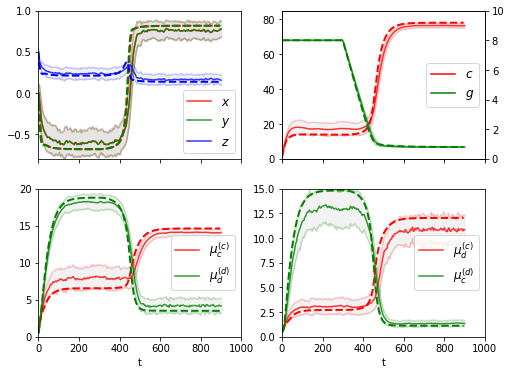

In [3]:
figure = ptr.mk_4plots({'b_d': 1.25, 'phi': .43, 'interaction': 0}, 
                       upper_limits=[1, 85, 20, 15, 10], 
                       legend_locations=[4, 7, 7, 7])

Yet for an imitation probability of the form 

$\frac{1}{1 + \exp(-8 (wi-wj)/(wi + wj))}$

as proposed by traulsen et al. 2008, the agreement betwen micro model and approximation becomes significantly worse - even though, the functional form is NOT approximated.

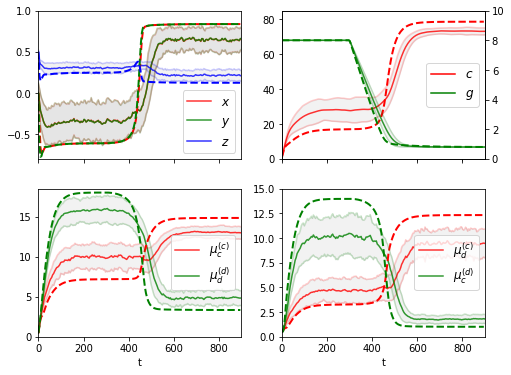

In [4]:
figure = ptr.mk_4plots({'b_d': 1.25, 'phi': .43, 'interaction': 1}, 
                       upper_limits=[1, 85, 18.5, 15, 10], 
                       legend_locations=[4, 7, 7, 7],
                       tmax=900)
figure.savefig('micro_macro_comparison.pdf')

And for an equally scale invariant but simpler interaction probabiltity such as

$\frac{1}{2} \frac{wi-wj}{wi+wj}$

the discrepancies are even bigger. See below:

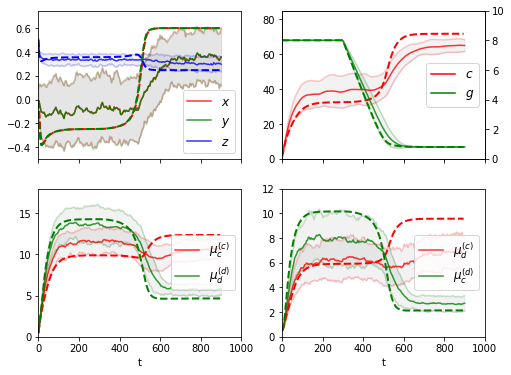

In [5]:
figure = ptr.mk_4plots({'b_d': 1.25, 'phi': .43, 'interaction': 2}, 
                       lower_limits=[-.5, 0, 0, 0, 0],
                       upper_limits=[.75, 85, 18, 12, 10], 
                       legend_locations=[4, 7, 7, 7])


It even seems like the imitation probability is too small to allow for propper discrimination of the two investment options. (But in case, this could be fixed by introducing a parameter..)

We can systematically check the differences for other values of phi and by calculating the L2 norm between e.g. the x trajectories of micro and macro model results:

Text(0,0.5,'$L_2$')

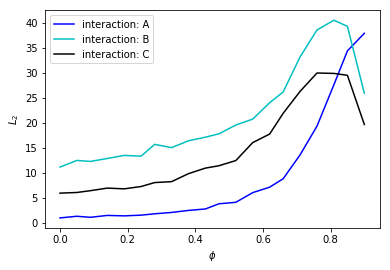

In [6]:
micro_data = ptr.micro_mean
macro_data = ptr.macro_mean

fig = plt.figure()
ax = fig.add_subplot(111)

colors = 'bck'
interaction_labels = 'ABC'

for i, interaction in enumerate([0, 1, 2]):
    mid = micro_data.xs(level=['b_d', 'interaction'], key=[1.25, interaction])
    mad = macro_data.xs(level=['b_d', 'interaction'], key=[1.25, interaction])
    dif = (mid - mad)**2
    x = dif[['x']].groupby(level=[0]).sum()
    ax.plot(x.index.values, x.values, label=f'interaction: {interaction_labels[i]}', color = colors[i])
ax.legend()
ax.set_xlabel('$\phi$')
ax.set_ylabel('$L_2$')

So, this confirms, that over almost the entire range of $\phi$, the first interaction term leads to be best approximation.

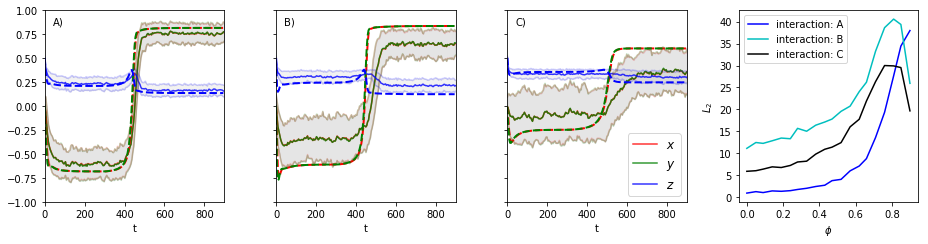

In [7]:
fig = plt.figure(figsize=(13, 3.5))
ax1 = fig.add_subplot(141)
ptr.mk_opinon_plots({'b_d': 1.25, 'phi': .43, 'interaction': 0}, 
                   y_limits=[-1, 1],
                   legend_location=0,
                   ax=ax1,
                   legend=False)
ax1.annotate('A)', xy=(40, .85))
ax2 = fig.add_subplot(142)
ptr.mk_opinon_plots({'b_d': 1.25, 'phi': .43, 'interaction': 1}, 
                   y_limits=[-1, 1],
                   legend_location=0,
                   ax=ax2,
                   legend=False,
                   y_ticks=False)
ax2.annotate('B)', xy=(40, .85))
ax3 = fig.add_subplot(143)
ptr.mk_opinon_plots({'b_d': 1.25, 'phi': .43, 'interaction': 2}, 
                   y_limits=[-1, 1],
                   legend_location=0,
                   ax=ax3,
                   y_ticks=False)
ax3.annotate('C)', xy=(40, .85))

ax4 = fig.add_subplot(144)

colors = 'bck'
interaction_labels = 'ABC'

for i, interaction in enumerate([0, 1, 2]):
    mid = micro_data.xs(level=['b_d', 'interaction'], key=[1.25, interaction])
    mad = macro_data.xs(level=['b_d', 'interaction'], key=[1.25, interaction])
    dif = (mid - mad)**2
    x = dif[['x']].groupby(level=[0]).sum()
    ax4.plot(x.index.values, x.values, label=f'interaction: {interaction_labels[i]}', color = colors[i])
ax4.legend()
ax4.set_xlabel('$\phi$')
ax4.set_ylabel('$L_2$')

fig.tight_layout()
fig.savefig('interactions123.pdf')

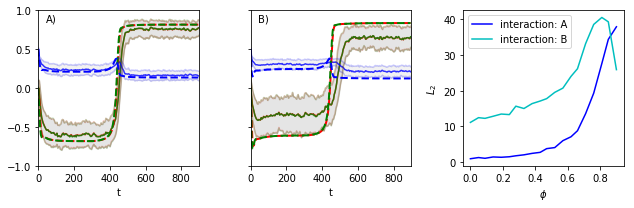

In [11]:
fig = plt.figure(figsize=(9, 3))
ax1 = fig.add_subplot(131)
ptr.mk_opinon_plots({'b_d': 1.25, 'phi': .43, 'interaction': 0}, 
                   y_limits=[-1, 1],
                   legend_location=0,
                   ax=ax1,
                   legend=False)
ax1.annotate('A)', xy=(40, .85))
ax2 = fig.add_subplot(132)
ptr.mk_opinon_plots({'b_d': 1.25, 'phi': .43, 'interaction': 1}, 
                   y_limits=[-1, 1],
                   legend_location=0,
                   ax=ax2,
                   legend=False,
                   y_ticks=False)
ax2.annotate('B)', xy=(40, .85))

ax4 = fig.add_subplot(133)

colors = 'bck'
interaction_labels = 'ABC'

for i, interaction in enumerate([0, 1]):
    mid = micro_data.xs(level=['b_d', 'interaction'], key=[1.25, interaction])
    mad = macro_data.xs(level=['b_d', 'interaction'], key=[1.25, interaction])
    dif = (mid - mad)**2
    x = dif[['x']].groupby(level=[0]).sum()
    ax4.plot(x.index.values, x.values, label=f'interaction: {interaction_labels[i]}', color = colors[i])
ax4.legend()
ax4.set_xlabel('$\phi$')
ax4.set_ylabel('$L_2$')

fig.tight_layout()
fig.savefig('interactions12.pdf')